# Huber Regression model
Let's test this out here

In [1]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
rng = np.random.RandomState(0)
X, y, coef = make_regression(
     n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
X[:4] = rng.uniform(10, 20, (4, 2))
y[:4] = rng.uniform(10, 20, 4)
huber = HuberRegressor().fit(X, y)
huber.score(X, y)


-7.284608623514573

In [12]:
huber.predict(X[:1,])


array([806.72000092])

## Difference with Linear Regression
Let's see what the difference is between Huber and Linear Regression for this data.

In [4]:
linear = LinearRegression().fit(X, y)
print("True coefficients:", coef)
print("Huber coefficients:", huber.coef_)
print("Linear Regression coefficients:", linear.coef_)

True coefficients: [20.4923687  34.16981149]
Huber coefficients: [17.79064252 31.01066091]
Linear Regression coefficients: [-1.92210833  7.02266092]


Right, That is a big difference!
 

## A great example of differences between Huber and Ridge
[original post](https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html)

Automatically created module for IPython interactive environment


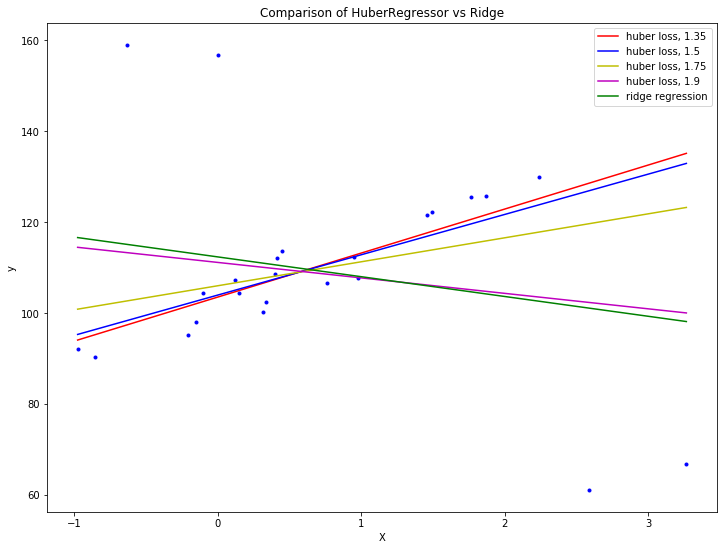

In [14]:
# Authors: Manoj Kumar mks542@nyu.edu
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4.0,
                       bias=100.0)

# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, 'b.')

# Fit the huber regressor over a series of epsilon values.
colors = ['r-', 'b-', 'y-', 'm-']

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1.35, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=0.0, random_state=0, normalize=True)
ridge.fit(X, y)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, 'g-', label="ridge regression")

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()